# S&P 500 Yearly Returns Analysis

## Overview
This notebook studies annual S&P 500 returns from 1789 through 2025. It focuses on distributional properties, volatility cycles, and long-term wealth creation to illuminate the U.S. equity market’s behavior over multiple centuries.

---

## Objectives
1. Characterize the annual return distribution and measure dispersion.
2. Identify historical patterns, regime shifts, and crisis impacts.
3. Quantify volatility and drawdown dynamics along with cumulative wealth effects.
4. Provide context that links return behavior to macroeconomic and structural changes over time.

---

## Dataset
- Source: S&P 500 price history (`S&P500_D_1789-05-01_2025-11-06.csv`).
- Coverage: 236+ annual observations spanning industrialization to the modern era.
- Returns: Simple year-over-year percentage changes plus log returns for cumulative plots.
- Processing: Daily data aggregated to year-end closing prices with consistent formatting.

---

## Methodology
- Convert daily data to year-end snapshots and compute `(Price_year_end / Price_prev_year_end) - 1` as the annual return.
- Derive log returns to illustrate compounded wealth accumulation.
- Quantify volatility, skewness, kurtosis, and extremes to support interpretation.
- Highlight regime shifts, crisis periods, and cyclical patterns in the visualizations.

---

## Outcomes
- Statistical summaries for every calendar year, including mean, median, and dispersion measures.
- Visual plots covering annual returns, cumulative log growth, and return distributions.
- Insights for investors and researchers interested in long-term equity behavior and historical anomalies.

---

## Notebook Structure
1. Data loading and validation.
2. Annual resampling with return calculations.
3. Descriptive statistics and distributional analysis.
4. Visualization suite for returns, cumulative growth, and risk metrics.
5. Historical context commentary and summary takeaways.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "S&P500_D_1789-05-01_2025-11-06.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "S&P500_D_1789-05-01_2025-09-17.csv"

# print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [12]:
# Calculate simple returns with pct_change()
df['simple_returns'] = df['close'].pct_change()

# Drop NA values that result from pct_change()
df.dropna(inplace=True)

# Show dataframe
df.head()

,open,high,low,close,volume,simple_returns
date,,,,,,
1789-06-01,0.51,0.51,0.51,0.51,0.0,0.000000
1789-07-01,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-01,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-01,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-01,0.51,0.51,0.51,0.51,0.0,0.000000


In [13]:
# resample to monthly frequency, taking the last observation of each month for OHLCV
monthly_ohlcv = df.resample('M').agg({
    'open': 'last',
    'high': 'last',
    'low': 'last',
    'close': 'last',
    'volume': 'last'
})

# simple_returns for monthly data
monthly_ohlcv['monthly_returns'] = monthly_ohlcv['close'].pct_change()

# Drop NA values that result from pct_change()
monthly_ohlcv.dropna(inplace=True)

# Show dataframe
monthly_ohlcv.head()

,open,high,low,close,volume,monthly_returns
date,,,,,,
1789-07-31,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-31,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-30,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-31,0.51,0.51,0.51,0.51,0.0,0.000000
1789-11-30,0.51,0.51,0.50,0.50,0.0,-0.019608


In [14]:
# Calculate log returns (Monthly) for all data
log_returns = (1 + monthly_ohlcv['monthly_returns']).apply(np.log)

# Cumulative sum of log returns (correct for compounding)
cumsum_log = log_returns.cumsum()

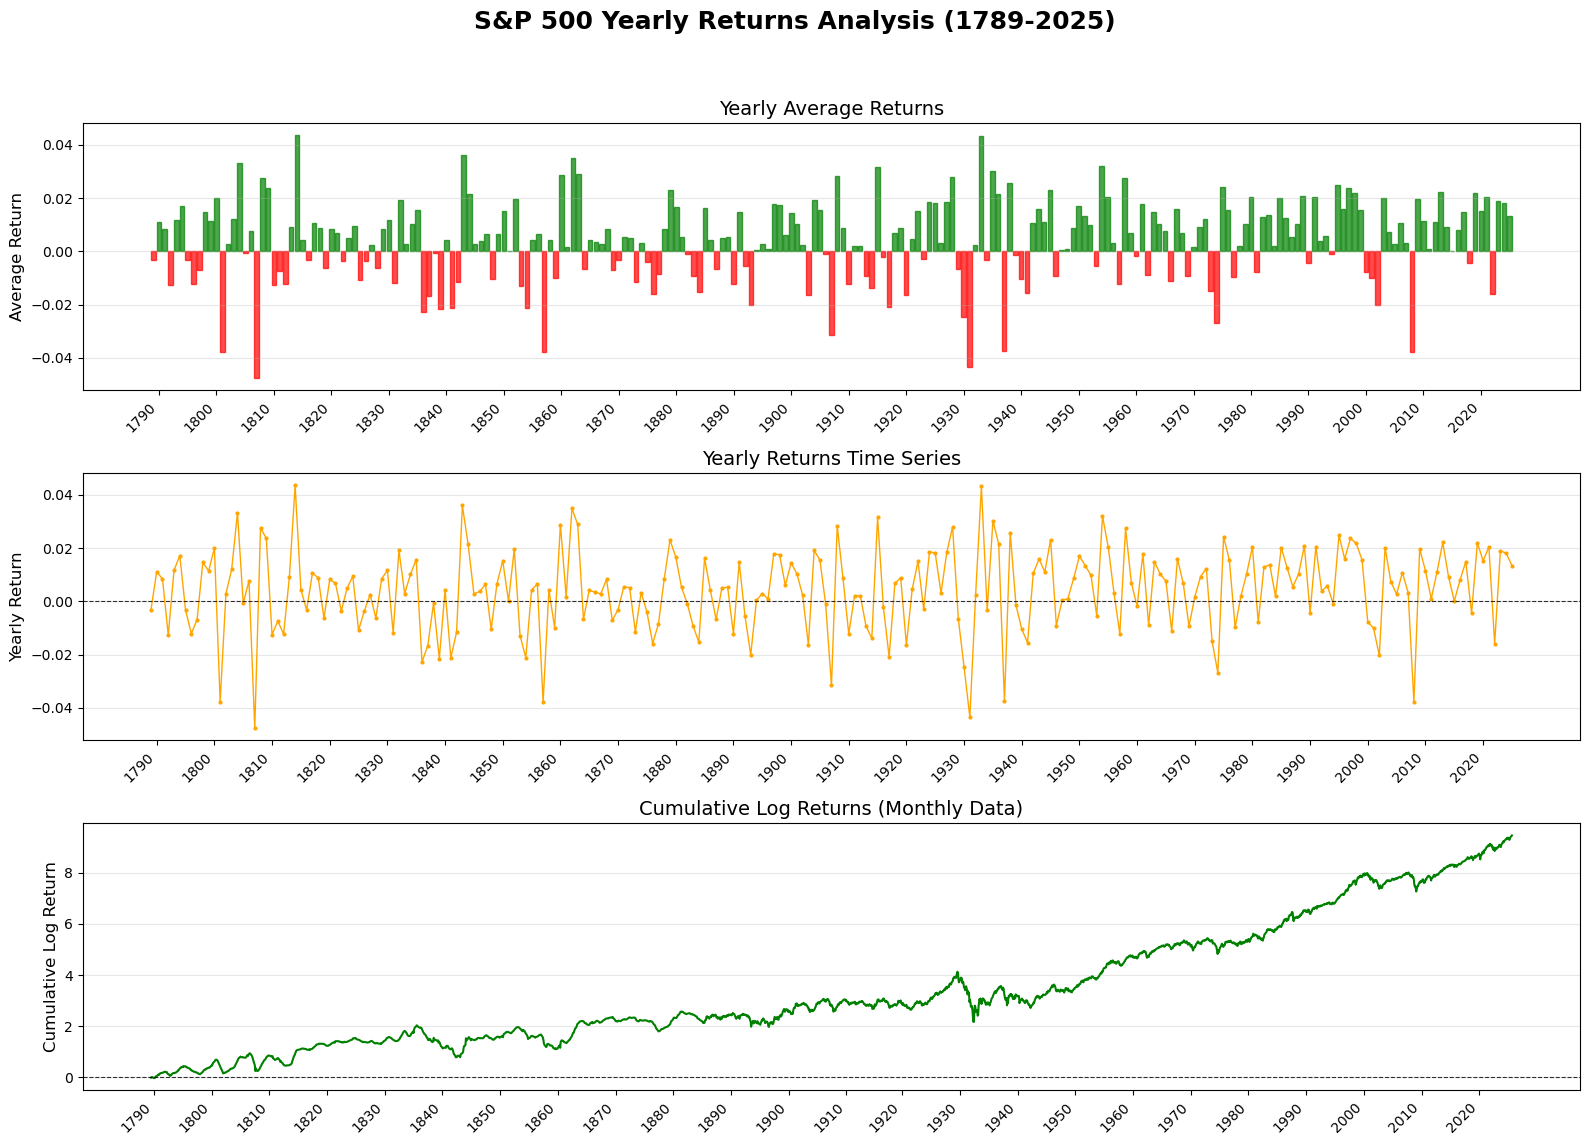


📊 S&P 500 Analysis Summary:
Data Range: 1789 - 2025 (237 years)
Plot shows every 10th year starting from 1790
Total data points: 237 yearly averages


In [15]:
# group by year and calculate mean returns for each year
yearly_avg_returns = monthly_ohlcv['monthly_returns'].groupby(monthly_ohlcv.index.year).mean()
yearly_avg_returns.index = ['Year ' + str(year) for year in yearly_avg_returns.index]

# Create custom tick positions for every 10th year
years = [int(year.split(' ')[1]) for year in yearly_avg_returns.index]
tick_positions = []
tick_labels = []

# Select every 10th year starting from 1790 (rounded up from 1789)
start_year = ((min(years) // 10) + 1) * 10  # Round up to nearest 10
for year in range(start_year, max(years) + 1, 10):
    if year <= max(years):
        year_label = f'Year {year}'
        if year_label in yearly_avg_returns.index:
            tick_positions.append(list(yearly_avg_returns.index).index(year_label))
            tick_labels.append(str(year))

# Plotting
plt.figure(figsize=(16, 12))
plt.suptitle('S&P 500 Yearly Returns Analysis (1789-2025)', fontsize=18, fontweight='bold')
plt.subplots_adjust(hspace=0.4)

# Subplot 1: Yearly Average Returns
plt.subplot(3, 1, 1)
bars = plt.bar(range(len(yearly_avg_returns)), yearly_avg_returns.values, color='skyblue', alpha=0.7)
plt.title('Yearly Average Returns', fontsize=14)
plt.ylabel('Average Return', fontsize=12)
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add color coding for positive/negative returns
for i, (bar, value) in enumerate(zip(bars, yearly_avg_returns.values)):
    if value >= 0:
        bar.set_color('green')
        bar.set_alpha(0.7)
    else:
        bar.set_color('red')
        bar.set_alpha(0.7)

# Subplot 2: Yearly Returns Time Series
plt.subplot(3, 1, 2)
plt.plot(range(len(yearly_avg_returns)), yearly_avg_returns.values, marker='o', linestyle='-', 
         color='orange', markersize=2, linewidth=1)
plt.title('Yearly Returns Time Series', fontsize=14)
plt.ylabel('Yearly Return', fontsize=12)
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.8)

# Subplot 3: Cumulative Log Returns
plt.subplot(3, 1, 3)
plt.plot(cumsum_log.values, color='green', linewidth=1.5)
plt.title('Cumulative Log Returns (Monthly Data)', fontsize=14)
plt.ylabel('Cumulative Log Return', fontsize=12)

# For cumulative plot, use different tick strategy since it's monthly data
monthly_years = cumsum_log.index.year
monthly_tick_positions = []
monthly_tick_labels = []
for year in range(start_year, max(monthly_years) + 1, 10):
    year_indices = np.where(monthly_years == year)[0]
    if len(year_indices) > 0:
        monthly_tick_positions.append(year_indices[0])
        monthly_tick_labels.append(str(year))

plt.xticks(monthly_tick_positions, monthly_tick_labels, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print information about the data range
print(f"\n📊 S&P 500 Analysis Summary:")
print(f"Data Range: {min(years)} - {max(years)} ({max(years) - min(years) + 1} years)")
print(f"Plot shows every 10th year starting from {start_year}")
print(f"Total data points: {len(yearly_avg_returns)} yearly averages")

In [16]:
# Statistical Summary of Yearly Returns
mean_return = yearly_avg_returns.mean()
median_return = yearly_avg_returns.median()
std_dev_return = yearly_avg_returns.std()
max_return = yearly_avg_returns.max()
min_return = yearly_avg_returns.min()

print("Statistical Summary of Yearly Returns:")
print(f"Mean Return: {mean_return:.4f}")
print(f"Median Return: {median_return:.4f}")
print(f"Standard Deviation: {std_dev_return:.4f}")
print(f"Max Return: {max_return:.4f}")
print(f"Min Return: {min_return:.4f}")

# print statistical summary using describe, yearly returns
print("\nDetailed Statistical Summary:")
print(yearly_avg_returns.describe())

Statistical Summary of Yearly Returns:
Mean Return: 0.0042
Median Return: 0.0052
Standard Deviation: 0.0154
Max Return: 0.0435
Min Return: -0.0476

Detailed Statistical Summary:
count    237.000000
mean       0.004244
std        0.015355
min       -0.047640
25%       -0.005379
50%        0.005164
75%        0.015041
max        0.043538
Name: monthly_returns, dtype: float64
